# Homework01_Ans

In [1]:
import warnings # 忽略警告訊息 
warnings.filterwarnings("ignore")

# 1. load_wine()

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets     # 引用 Scikit-Learn 中的 套件 datasets

ds = datasets.load_wine()
print(ds.DESCR)                  # DESCR: description，描述載入內容

# 1. Dataset
X =pd.DataFrame(ds.data, columns=ds.feature_names)
# print(X.head())
y = ds.target
# print(y)

# # 2. Data clean
# print(X.isna().sum())

# # 3. Date Feturing
# # None

# 4. Split
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.1)
print(X_train.shape, y_train.shape)
# 得到 (160, 13) (160,)
# print('------------------------------------------')

# 5-1. Define and train the KNN model
from sklearn.neighbors import KNeighborsClassifier as KNN
clf = KNN(n_neighbors=3)

# 訓練
clf.fit(X_train, y_train)

# 打分數
print(clf.score(X_test, y_test))
# score = 0.72

# 驗證答案
print(list(y_test))
print(list(clf.predict(X_test)))
# [0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 2, 2, 1]
# [0, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2]
# 錯 5 個

# 5-2. Define and train the LogisticRegression model
from sklearn.linear_model import LogisticRegression as lr
clf2 = lr(solver='liblinear')
# 訓練
clf2.fit(X_train, y_train)

# 打分數
print(clf2.score(X_test, y_test))
# score = 1.0

# 驗證答案
print(list(y_test))
print(list(clf.predict(X_test)))
# [2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1]
# [2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1]
# 全對!

X_test.to_csv('wine_test.csv', index=False)

# 補充：存取 & 取用模型
import joblib as jb
# 存取
jb.dump(clf2, 'wine.joblib')

# 讀取
X = pd.read_csv('wine_test.csv')
print('存取/取用:\n', list(y_test))
print(list(clf2.predict(X)))

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

# 2. load_diabetes()

In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets, neighbors     # 引用 Scikit-Learn 中的 套件 datasets

ds = datasets.load_diabetes()
print(ds.DESCR)                  # DESCR: description，描述載入內容

# 1. Dataset
X = pd.DataFrame(ds.data, columns=ds.feature_names)
y = ds.target
print(X)    # 經過標準化: (X-m)/sigma，平均為 0 / 標準差為 1
print(y)

# 2. Data clean
print(X.isna().sum())

# 3. Date Feturing
# None

# 4. Split
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
# 得到 (353, 10) (353,)

# 5. Define and train the LinearRegression model
from sklearn.linear_model import LinearRegression as lr
clf = lr()

# 訓練
clf.fit(X_train, y_train)

# 打分數
print(f'{clf.score(X_test, y_test):.2}')
# score = 0.50

from sklearn.metrics import mean_squared_error, r2_score
y_pred = clf.predict(X_test)

# Coefficients (一次項式係數)
# y = w1*x1 + w2*x2 + w3*x3 ... w10*x10 + b
print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

# MSE (均方誤差)
# 1/n * sum(y_pred-y_test)
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')

# Coefficient of determination (判定係數)
# 越接近 1 越好
print(f'Coefficient of determination: {r2_score(y_test, y_pred)}')

# # 驗證答案
# print(list(y_test))
# print(list(clf.predict(X_test)))

# # # 補充：存取 & 取用模型
# # import joblib as jb
# # # 存取
# # jb.dump(clf2, 'wine.joblib')

# # # 讀取
# # X = pd.read_csv('wine_test.csv')
# # print('存取/取用:\n', list(y_test))
# # print(list(clf2.predict(X)))

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

# 3. Tips

     total_bill  tip     sex smoker   day    time  size
0          17.0 1.01  Female     No   Sun  Dinner     2
1          10.3 1.66    Male     No   Sun  Dinner     3
2          21.0  3.5    Male     No   Sun  Dinner     3
3          23.7 3.31    Male     No   Sun  Dinner     2
4          24.6 3.61  Female     No   Sun  Dinner     4
..          ...  ...     ...    ...   ...     ...   ...
239        29.0 5.92    Male     No   Sat  Dinner     3
240        27.2  2.0  Female    Yes   Sat  Dinner     2
241        22.7  2.0    Male    Yes   Sat  Dinner     2
242        17.8 1.75    Male     No   Sat  Dinner     2
243        18.8  3.0  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
['Sun' 'Sat' 'Thur' 'Fri']
day
Fri    2.73
Sat    2.99
Sun    3.26
Thur   2.77
Name: tip, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


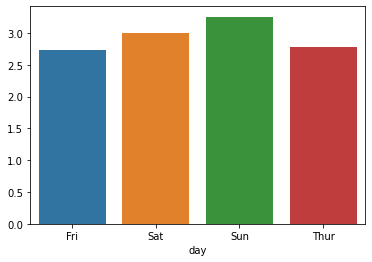

(195, 6) (195,)
------------------------------------------
score = 0.41
[5.0, 1.44, 1.17, 2.0, 2.71, 6.5, 2.0, 2.05, 3.55, 1.5, 3.71, 5.65, 10.0, 2.0, 3.23, 3.92, 2.0, 1.32, 4.0, 3.48, 1.48, 3.0, 2.0, 1.75, 2.75, 3.0, 2.0, 5.16, 3.0, 3.0, 3.5, 2.0, 2.54, 3.76, 4.34, 2.5, 3.23, 2.74, 3.31, 3.5, 3.09, 1.5, 2.5, 3.0, 2.88, 1.0, 2.0, 1.98, 3.5]
[6.3, 1.7, 4.0, 4.3, 2.7, 3.5, 3.0, 3.9, 4.1, 2.4, 2.8, 3.1, 5.8, 2.8, 2.6, 3.1, 3.1, 2.0, 3.2, 3.6, 1.9, 3.0, 2.6, 2.8, 3.0, 2.9, 2.3, 3.8, 2.5, 2.7, 2.9, 2.1, 2.7, 3.1, 3.9, 2.4, 2.5, 2.9, 3.3, 2.7, 4.1, 2.1, 2.4, 2.6, 3.0, 1.1, 2.6, 2.0, 2.8]


In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets     # 引用 Scikit-Learn 中的 套件 datasets
pd.set_option('display.float_format', lambda x: f'{x:.3}')           # 轉換 '科學記號' to '浮點數'


df = pd.read_csv('tips.csv')
print(df)

# 1. Dataset
X = df.drop('tip', axis=1)
# print(X.head())
y = df['tip']
# print(y.head())

# 2. Data clean
# 2-1. isna
print(df.isna().sum())

# 2-2. coding coulumn item
print(X['day'].unique())

gb = df.groupby(['day'])['tip'].mean()
print(gb)
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(gb.index, gb.values)
plt.savefig('pic_18.png')
plt.show()

X['sex'].replace({'Female' : 0, 'Male' : 1}, inplace=True)
X['smoker'].replace({'Yes' : 0, 'No' : 1}, inplace=True)
X['day'].replace({'Thur' : 0, 'Fri' : 0, 'Sat' : 2, 'Sun' : 3}, inplace=True)
X['time'].replace({'Lunch' : 0, 'Dinner' : 1}, inplace=True)
# print(X)
# print(y)

# 3. Date Feturing

# 4. Split
from sklearn.model_selection import train_test_split as tts

# test_size=0.2 : 測試用資料為 20%
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
# 得到 (195, 6) (195,)
print('------------------------------------------')


# 5. Define and train the LinearRegression model
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)

print(f'score = {clf.score(X_test, y_test):.2}')

# 驗證答案
print(list(y_test))
b = [float(f'{i:.2}') for i in clf.predict(X_test)]
print(b)